# Usage of the TreeView package

In [2]:
using TreeView

The `@tree` macro displays a given expression as a directed graph:

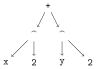

In [2]:
@tree x^2 + y^2

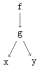

In [4]:
@tree f(g(x, y))

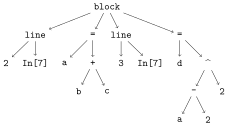

In [7]:
@tree begin
    a = b + c
    d = (a - 2)^2
end

Internally, function calls in `Expr`essions are represented using nodes with `call`, which can also be visualized:

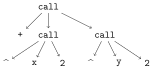

In [3]:
@tree_with_call x^2 + y^2

You can save your trees to PDF, SVG, and TEX using TikzPictures

In [3]:
using TikzPictures

t = @tree x^2 + y^2

TikzPictures.save(PDF("tree"), tikz_representation(t))
TikzPictures.save(SVG("tree"), tikz_representation(t))
TikzPictures.save(TEX("tree"), tikz_representation(t))

## Directed Acyclic Graphs (DAGs)

Directed Acyclic Graphs (DAGs) give a higher-level view of the graph, with less Julia-specific detail.

In the following, the expression `x+y` is repeated twice:

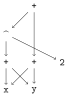

In [9]:
@dag (x + y)^2 + (x + y)

We can apply **Common Subexpression Elimination** (CSE) from the [`CommonSubexpressions.jl` package](https://github.com/rdeits/CommonSubexpressions.jl/):

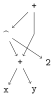

In [10]:
@dag_cse (x + y)^2 + (x + y)

We see that the common subexpression `x+y` now appears only once.